# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#API Keys
from api_keys import weather_api_key

#Import cities
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#List of latitudes and longitudes
lat_lngs = []

#List of cities
cities = []

#Range of lats and lngs
lat_range = (-90,90)
lng_range = (-180,180)

#Randomly generate latitudes and longitudes
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

#Find the nearest city for each coordinate pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #Add unique cities to cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#Base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#City data list
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL with each city
    city_url = url + city
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | la ronge
Processing Record 3 of Set 1 | coahuayana
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | seminole
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | atocha
Processing Record 8 of Set 1 | eureka
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | yulin
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | san quintin
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | brookhaven
Processing Record 22 of Set

Processing Record 36 of Set 4 | shunyi
Processing Record 37 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 38 of Set 4 | sinnamary
Processing Record 39 of Set 4 | utiroa
City not found. Skipping...
Processing Record 40 of Set 4 | fethiye
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | rybachiy
Processing Record 43 of Set 4 | fayaoue
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | amapa
Processing Record 47 of Set 4 | pangnirtung
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | tigil
Processing Record 0 of Set 5 | kitimat
Processing Record 1 of Set 5 | wilmington
Processing Record 2 of Set 5 | jabinyanah
Processing Record 3 of Set 5 | san cataldo
Processing Record 4 of Set 5 | waterloo
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | kokkola
Processing Record 8 of Set 5 | wulanhaote
City not

Processing Record 26 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 8 | khasan
Processing Record 28 of Set 8 | severo-kurilsk
Processing Record 29 of Set 8 | kiama
Processing Record 30 of Set 8 | qaqortoq
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | siddipet
Processing Record 34 of Set 8 | khilchipur
Processing Record 35 of Set 8 | konstantinovka
Processing Record 36 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | bende
Processing Record 41 of Set 8 | innisfail
Processing Record 42 of Set 8 | bin qirdan
Processing Record 43 of Set 8 | rincon
Processing Record 44 of Set 8 | beringovskiy
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | umm lajj
Proc

City not found. Skipping...
Processing Record 8 of Set 12 | iqaluit
Processing Record 9 of Set 12 | abu samrah
Processing Record 10 of Set 12 | champerico
Processing Record 11 of Set 12 | karpathos
Processing Record 12 of Set 12 | alihe
Processing Record 13 of Set 12 | brae
Processing Record 14 of Set 12 | mount gambier
Processing Record 15 of Set 12 | boyolangu
Processing Record 16 of Set 12 | micheweni
Processing Record 17 of Set 12 | diamantino
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
#Convert into DataFrame
city_data_df = pd.DataFrame(city_data)

#Show record count
city_data_df.count()

City          512
Lat           512
Lng           512
Max Temp      512
Humidity      512
Cloudiness    512
Wind Speed    512
Country       512
Date          512
dtype: int64

In [6]:
#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.52,76,87,3.46,KI,1681089489
1,la ronge,55.1001,-105.2842,3.79,98,97,2.50,CA,1681089335
2,coahuayana,18.7333,-103.6833,26.40,57,100,1.69,MX,1681089490
3,rikitea,-23.1203,-134.9692,25.01,63,0,3.37,PF,1681089490
4,seminole,28.7086,-81.2081,20.59,93,100,5.14,US,1681089263


In [7]:
#Export city data to csv
city_data_df = city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
#Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.52,76,87,3.46,KI,1681089489
1,la ronge,55.1001,-105.2842,3.79,98,97,2.50,CA,1681089335
2,coahuayana,18.7333,-103.6833,26.40,57,100,1.69,MX,1681089490
3,rikitea,-23.1203,-134.9692,25.01,63,0,3.37,PF,1681089490
4,seminole,28.7086,-81.2081,20.59,93,100,5.14,US,1681089263


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

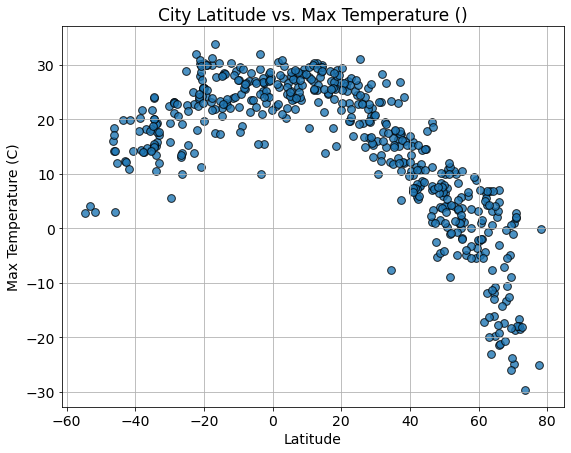

In [13]:
#Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Max Temperature (C)",size=14)
plt.title("City Latitude vs. Max Temperature ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude Vs. Humidity

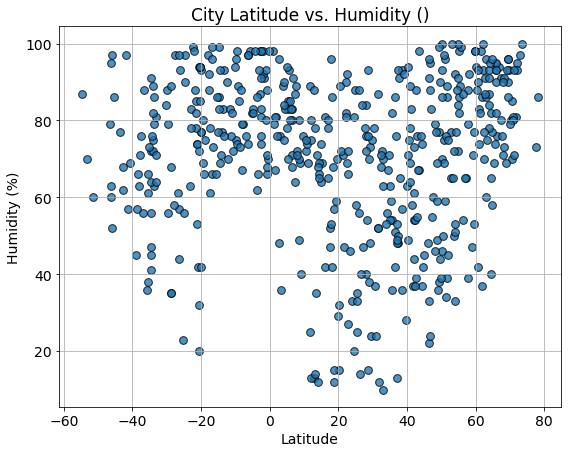

In [15]:
#Build scatter plot for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.title("City Latitude vs. Humidity ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

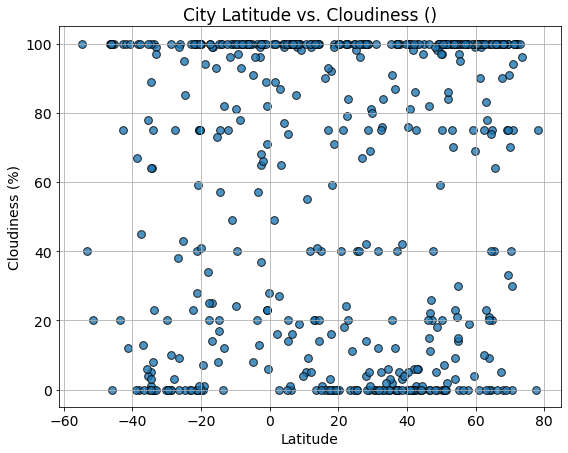

In [16]:
#Build scatter plot for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness (%)",size=14)
plt.title("City Latitude vs. Cloudiness ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

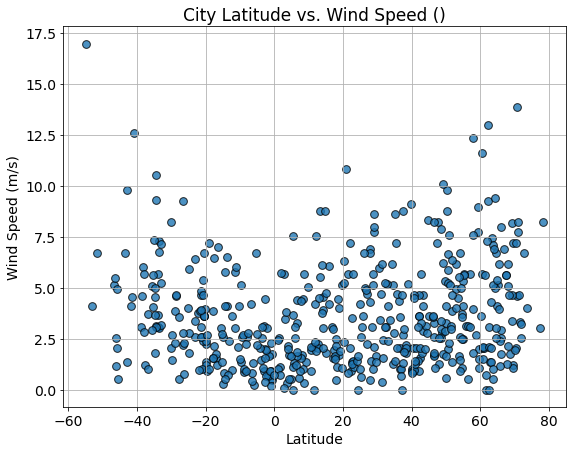

In [17]:
#Build scatter plot for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed (m/s)",size=14)
plt.title("City Latitude vs. Wind Speed ()",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [18]:
#Define a function to create Linear Regression plots
def lr(a,b,c,d,e,f):
    
    #Build scatter plot
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60)

    #Incorporate the other graph properties
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    
    #Regression
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is {r}")
    print(f"The r-quared value is {r**2}")
    
    #Show plot
    plt.show()

In [19]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=70]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,chokurdakh,70.6333,147.9167,-18.62,85,30,4.59,RU,1681089491
39,dikson,73.5069,80.5464,-29.61,100,96,4.02,RU,1681089501
44,clyde river,70.4692,-68.5914,-24.87,70,0,2.06,CA,1681089503
73,qaanaaq,77.4840,-69.3632,-25.17,73,0,3.00,GL,1681089511
111,khatanga,71.9667,102.5000,-18.58,95,100,2.52,RU,1681089523


In [20]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rikitea,-23.1203,-134.9692,25.01,63,0,3.37,PF,1681089490
5,hobart,-42.8794,147.3294,12.35,68,75,9.77,AU,1681089247
6,atocha,-20.9333,-66.2333,11.28,42,59,2.60,BO,1681089491
11,punta arenas,-53.1500,-70.9167,4.06,70,40,4.12,CL,1681089492
13,coquimbo,-29.9533,-71.3436,15.85,88,20,2.06,CL,1681089001
